**Time Allowed -- 45 mins and 5 mins for submission of .ipynb file**

---


No Internet Browser is alloed except Gogle Collab.

---


You can use Google Collab / Jupyter notenook to solve Qiz.

---


Any plagiarism will result in ZERO marks in Quiz

---


**Total Marks -- 25**

---


**Weightage -- 4-5 absolutes**

---


You only have to submit .ipynb file with your roll num **21L-XXXX**  as file name.

In [8]:
import pandas as pd
import numpy as np
import random

# Create a DataFrame with 500 rows and realistic column names
num_rows = 500  # Number of rows in the dataset

# Generate random data for columns with realistic names
data = {
    "Age": [random.randint(18, 65) for _ in range(num_rows)],
    "Weight (kg)": [random.uniform(45, 100) for _ in range(num_rows)],
    "Salary ($)": [random.randint(30000, 120000) for _ in range(num_rows)],
    "Height (cm)": [random.uniform(150, 200) for _ in range(num_rows)],
    "Experience (years)": [random.uniform(0, 20) for _ in range(num_rows)]
}

# Introduce outliers in some columns
outliers_count = 10  # Number of outliers to add to each column

for col_name in ["Age", "Weight (kg)", "Salary ($)", "Height (cm)", "Experience (years)"]:
    outliers_indices = random.sample(range(num_rows), min(outliers_count, num_rows))
    for _ in range(min(outliers_count, num_rows)):
        data[col_name][outliers_indices.pop()] = random.randint(200, 1000)

# Create a DataFrame from the dictionary
df = pd.DataFrame(data)

# Display the first few rows of the dataset
print(df.head())
# saving the dataframe
df.to_csv('data.csv', index=False)

   Age  Weight (kg)  Salary ($)  Height (cm)  Experience (years)
0   20    77.834267       46251   163.685830            2.441923
1   41    73.519356       48061   188.957530            4.647265
2   60    89.194783       72779   153.376224           17.481806
3   63    52.700953       90420   172.437310            1.671274
4   28    57.745969       51090   162.027463            3.668170


**QUESTION-1**
You are given a dataset of 500 numerical values. Among these values, there are outliers in some columns. Your task is to identify and report the outliers. Write a Python function named 'find_outliers' that takes the dataset as input and returns count of the outliers from each column.

## Using Z-Score Question

In [29]:
import pandas as pd
import numpy as np

# Load the dataset from a CSV file
df = pd.read_csv("data.csv")

# Function to count outliers using Z-score method for a specific column
def find_outliers(column, threshold=2.5):
    # TODO: Implement the Z-score method to count outliers for the column

    mean = column.mean()
    std_dev = column.std()

    # Calculate the Z-scores for each data point in the column
    z_scores = (column - mean) / std_dev

    # Count the number of data points that exceed the threshold
    outliers = (z_scores > threshold) | (z_scores < -threshold)

    return outliers.sum()

# Define a threshold
threshold = 2.5

# Dictionary to store outlier counts for each column
outlier_counts = {}

# Iterate through columns and count outliers
for col_name in df.columns:
    column = df[col_name]
    count = find_outliers(column, threshold)
    outlier_counts[col_name] = count

# Display the count of outliers for each column
for col_name, count in outlier_counts.items():
    print(f"Number of outliers in '{col_name}': {count}")

Number of outliers in 'Age': 10
Number of outliers in 'Weight (kg)': 8
Number of outliers in 'Salary ($)': 10
Number of outliers in 'Height (cm)': 9
Number of outliers in 'Experience (years)': 9


**QUESTION-2**
Write python code to create a border around an image as given below. The length of top and bottom border must be 10% of the original height of the image and length of right and left borders must be 10% of the original horizontal length of the image. Calculate its equalized histogram using code from previous Lab. Apply your histogram equalization technique on all the 3 channels (R,G,B) of given dark image, and show the result.

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2
from google.colab.patches import cv2_imshow

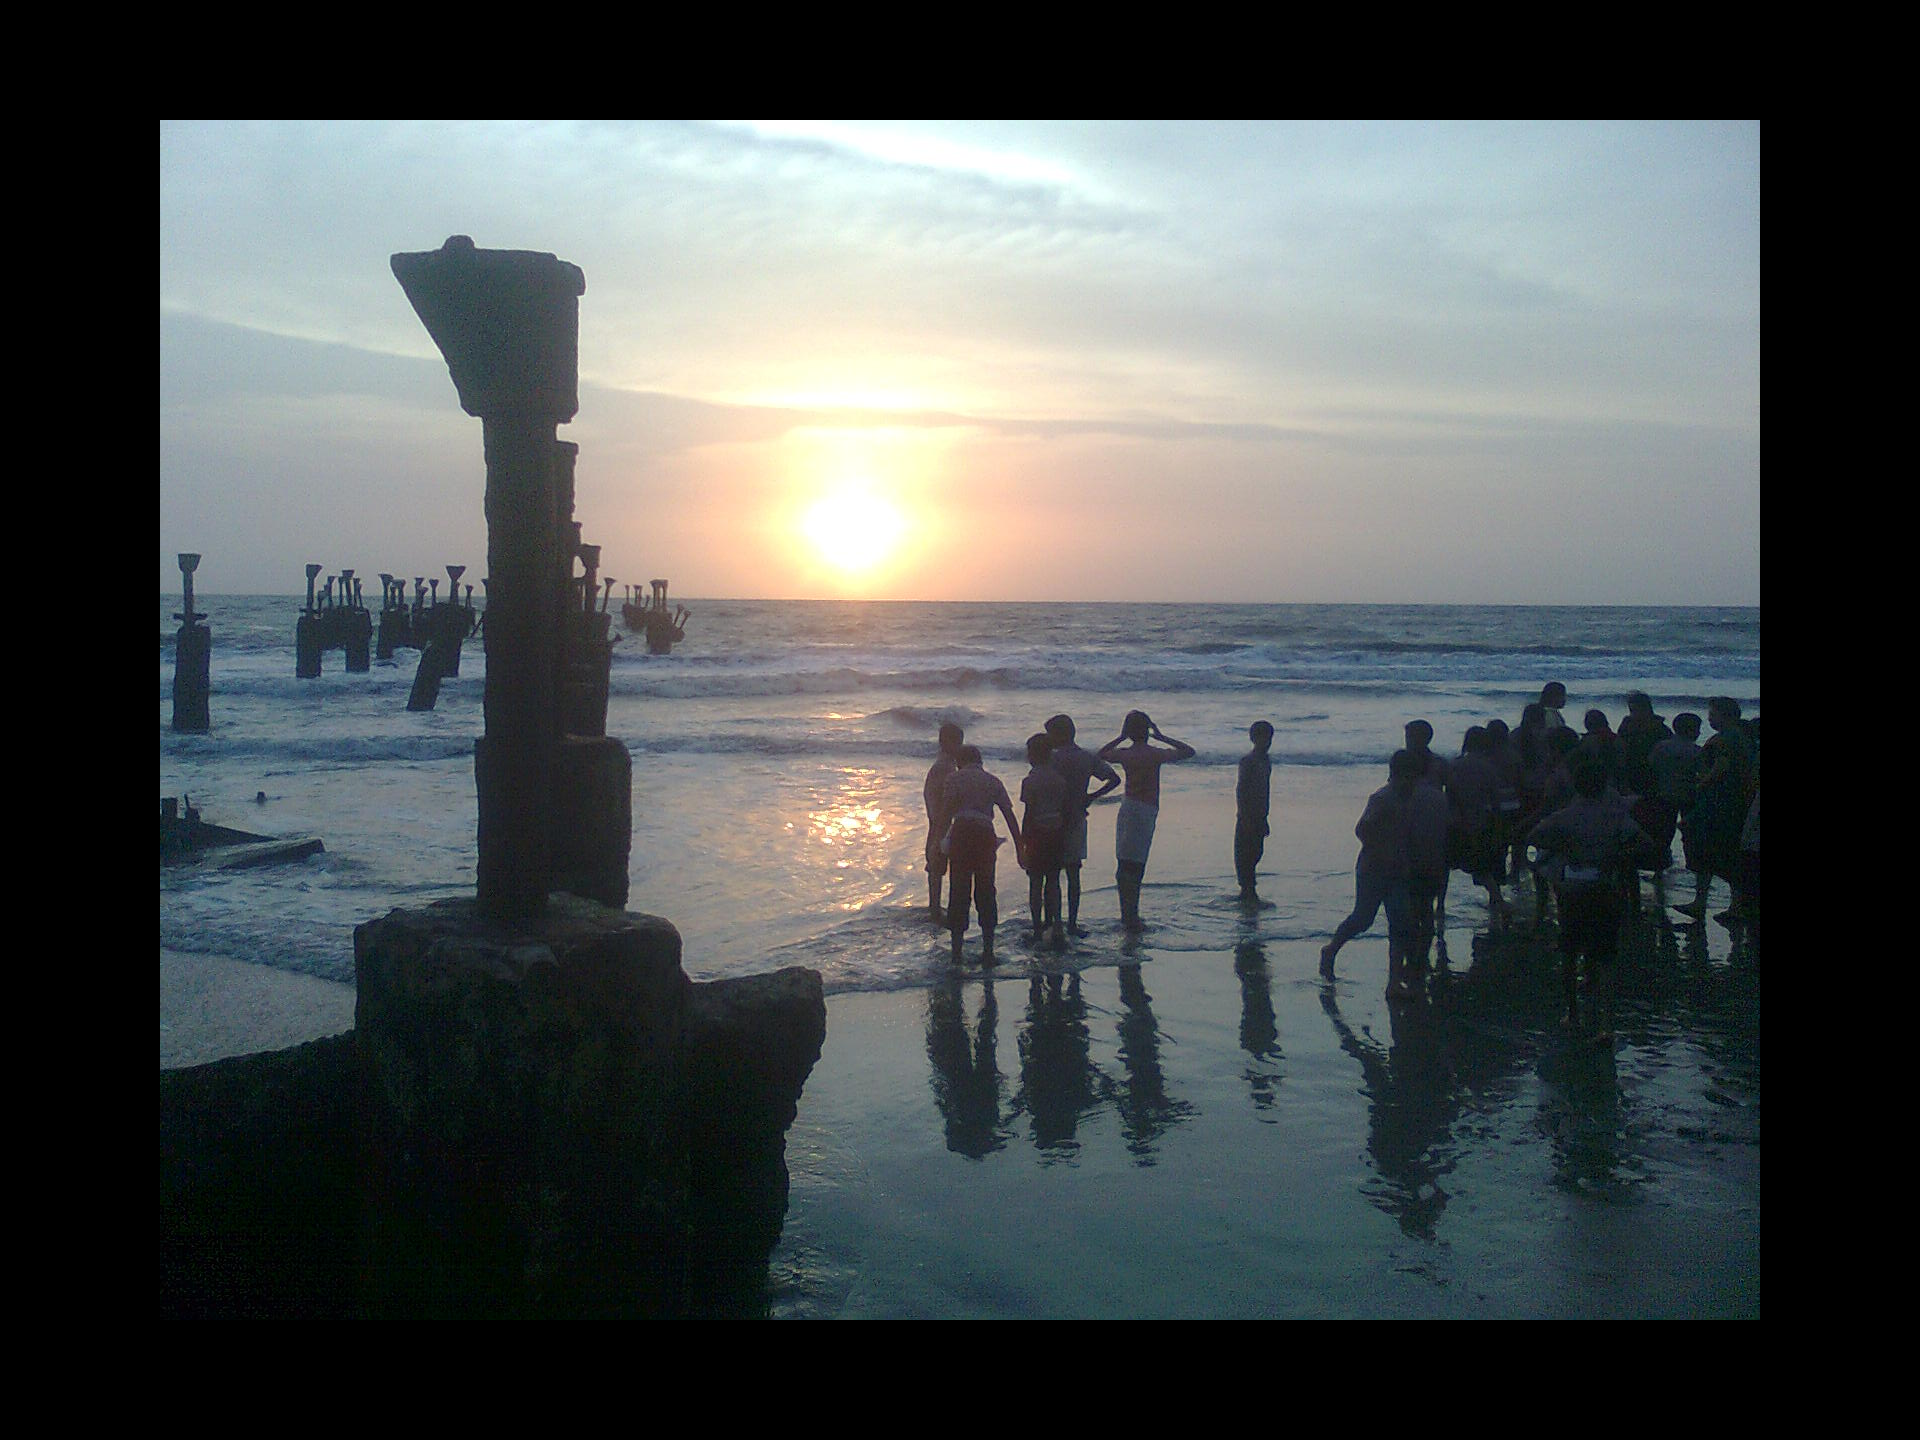

In [35]:
import cv2
import numpy as np

# Load the image
image = cv2.imread('/content/1.jpg')  # Replace 'your_image.jpg' with the actual image file path

# Check if the image was loaded successfully
if image is None:
    print("Error: The image could not be loaded.")
else:
    # Calculate border sizes (10% of the original dimensions)
    height, width, _ = image.shape
    top = int(0.10 * height)
    bottom = int(0.10 * height)
    left= int(0.10 * width)
    right = int(0.10 * width)

    # Create a bordered image
    bordered_image = cv2.copyMakeBorder(
        image,
        top,
        bottom,
        left,
        right,
        cv2.BORDER_CONSTANT,
        value=[0, 0, 0]  # Border color (black in BGR)
    )

    # Function to perform histogram equalization on an image
    def equalize_histogram(image):
        lab_image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)  # Convert to LAB color space
        l, a, b = cv2.split(lab_image)

        # Apply histogram equalization to the L channel
        l_eq = cv2.equalizeHist(l)
        lab_eq = cv2.merge((l_eq, a, b))

        # Convert the image back to BGR color space
        equalized_image = cv2.cvtColor(lab_eq, cv2.COLOR_LAB2BGR)
        return equalized_image

    # Apply histogram equalization to the bordered image
    equalized_image = equalize_histogram(bordered_image)

    # Display the original and equalized images
    from google.colab.patches import cv2_imshow
    cv2_imshow(bordered_image)


    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [32]:
from PIL import Image
from skimage import exposure
image_path=("/content/data.csv")
def equalize_histogram(image_path):
    # Open the image
    image = Image.open("/content/1.jpg")

    # Convert the image to RGB mode if necessary
    if image.mode != 'RGB':
        image = image.convert('RGB')

    # Split the image into three channels (R, G, B)
    r, g, b = image.split()

    # Apply histogram equalization to each channel
    r_eq = exposure.equalize_hist(r)
    g_eq = exposure.equalize_hist(g)
    b_eq = exposure.equalize_hist(b)

    # Merge the equalized channels back into an RGB image
    equalized_image = Image.merge('RGB', (r_eq, g_eq, b_eq))

    # Show the result
    equalized_image.show()

# Example usage
equalize_histogram("/content/1.jpg")


AttributeError: ignored